Absenteeism at work Data Set
https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

Data Set Information:
The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.

Multivariate, Time-Series
Classification, Clustering


Attribute Information:
1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)


In [1]:
# Importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
df = pd.read_csv('Absenteeism_at_work.csv', sep = ';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
# Shape of the data
df.shape

(740, 21)

In [4]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

so, we have no missing data to handle, also all features are numeric too. Also, just so that we do not have hindrances while performing our EDA - let us rename the column 'Work load Average/day' which has a '/' to text 'Work load Average per day' 

In [5]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
df.rename(columns={'Work load Average/day ': 'Work load Average per day'}, inplace=True, errors = 'raise')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average per day          740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [8]:
# Let us see the statistical summary of the dataset
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Based on the above description lets document some observations:
    1. Reason for absence - includes '0' which in the description is not present.
    2. Month of absence - includes '0' as min and 12 as max - so '0' here also needs to be further analysed
    3. Disciplinary failure includes the most '0's - so we will need to have a further look here as well
    4. Our target feature - Absenteeism time in hours has min value as '0'

In [9]:
df[df['Month of absence'] == 0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


as we see, the above dont seem to be legit records as along with Month of absence, we also have reason for absence as zero and even Absenteeism time in hours as zero. Let us discard these records

In [10]:
df = df[df['Month of absence'] != 0]

In [11]:
len(df[df['Absenteeism time in hours'] == 0])

41

There are 41 records with 'Absenteeism time in hours' as zero, let us further have  look at the same

In [12]:
len(df[(df['Absenteeism time in hours'] == 0) & (df['Disciplinary failure'] == 1) ])

40

In [13]:
# since all these records seem to have some similarity, let us first check the other record
df[(df['Absenteeism time in hours'] == 0) & (df['Disciplinary failure'] != 1)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
134,34,27,1,2,2,118,10,10,37,308.593,...,0,1,0,0,0,0,83,172,28,0


as we see, for this record the reason for absence is 27 - Physiotherapy as per description, 
so let us update the value of Absenteeism time in hours with the avg of Absenteeism time in hours when reason for absence is 27

In [14]:
# df[df['Reason for absence']==27]['Absenteeism time in hours'].mean()
df.loc[(df['Reason for absence']==27) & (df['Absenteeism time in hours'] == 0), 'Absenteeism time in hours']= 3

Further, let us check on the basis of Disciplinary failure

In [15]:
df.shape

(737, 21)

In [16]:
len(df[(df['Absenteeism time in hours']==0) & (df['Reason for absence'] == 0)])

40

Let us average out the Absenteeism time in hours when reason for absence is zero and also disciplinary failure = 1 as 8 

In [17]:
df.loc[(df['Absenteeism time in hours']==0) & (df['Reason for absence'] == 0), 'Absenteeism time in hours'] = 8 

In [18]:
len(df[(df['Absenteeism time in hours']==0) & (df['Reason for absence'] == 0)])

0

In [19]:
df['Month of absence'].value_counts()

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
Name: Month of absence, dtype: int64

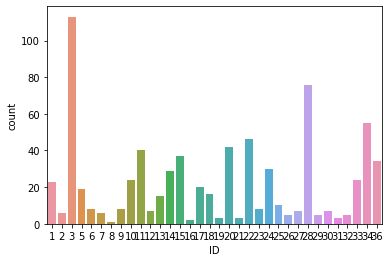

In [20]:
#df['ID'].value_counts

sns.countplot(df['ID'])
plt.show()

The above graph shows the absenteeism count of individuals

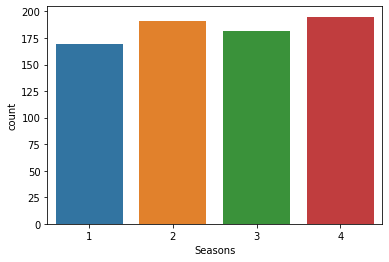

In [21]:
sns.countplot(df['Seasons'])
plt.show()

here, we can see that absenteeism does not have much dependency on seasons

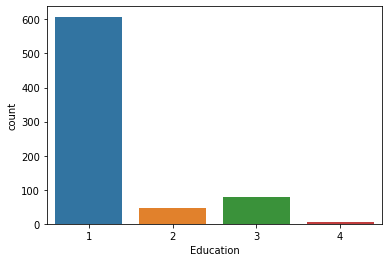

In [22]:
sns.countplot(df['Education'])
plt.show()

But we do notice that absenteeism does have much dependency on level of education  (high school (1), graduate (2), postgraduate (3), master and doctor (4))

In [23]:
df['Reason for absence'].mode()

0    23
dtype: int64

In [24]:
df['Reason for absence'].value_counts()

23    149
28    112
27     69
13     55
0      40
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

based on the above plot and the value counts and mode, it can be noted that reason no 23 - 'Medical Consultation' is the most common cause stated for absenteeism. 
Followed by - 28 - dental consultation
27 - physiotherapy
13 - Diseases of the musculoskeletal system and connective tissue
0 - probably no reason 
and 19 - Injury

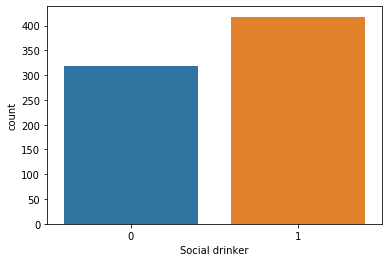

In [25]:
sns.countplot(df['Social drinker'])
plt.show()

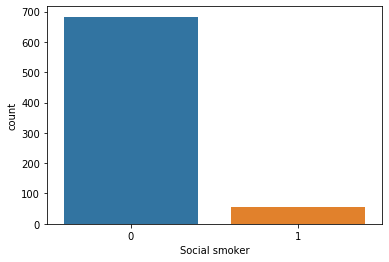

In [26]:
sns.countplot(df['Social smoker'])
plt.show()

Well, there is good coorelation as to abseneeism and social smoking

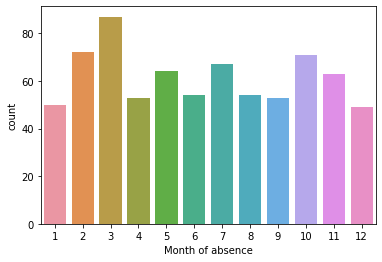

In [27]:
sns.countplot(df['Month of absence'])
plt.show()

In [28]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average per day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

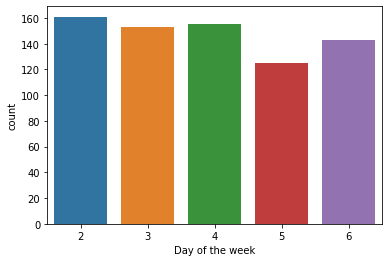

In [29]:
sns.countplot(df['Day of the week'])
plt.show()

# Bivariate analysis

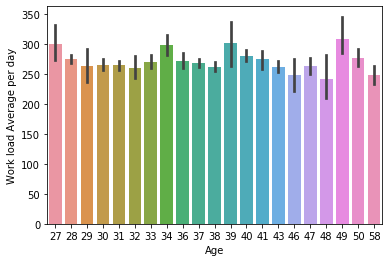

In [30]:
sns.barplot(x='Age', y='Work load Average per day', data=df)
plt.show()

as we see, age and workload do not seem to be correlated..

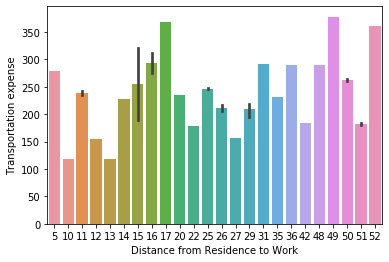

In [31]:
sns.barplot(y='Transportation expense', x='Distance from Residence to Work', data=df)
plt.show()

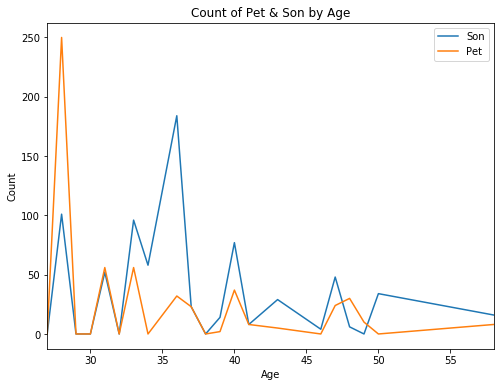

In [32]:
fig = df.groupby('Age')['Son', 'Pet'].sum().plot(figsize=(8,6))
fig.set_ylabel('Count')
fig.set_title('Count of Pet & Son by Age')
plt.show()

In [33]:
df_corr = df.corr()

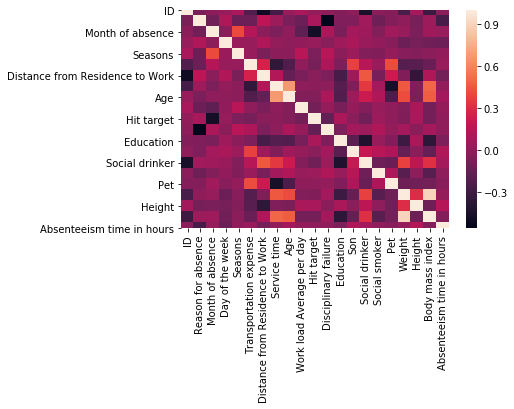

In [34]:
sns.heatmap(df.corr())
plt.show()

In [35]:
df.skew()

ID                                 0.012958
Reason for absence                -0.921765
Month of absence                   0.073898
Day of the week                    0.102439
Seasons                           -0.040918
Transportation expense             0.394709
Distance from Residence to Work    0.314339
Service time                      -0.001710
Age                                0.697404
Work load Average per day          0.959429
Hit target                        -1.257923
Disciplinary failure               3.942796
Education                          2.102144
Son                                1.088565
Social drinker                    -0.271667
Social smoker                      3.281926
Pet                                2.698853
Weight                             0.018906
Height                             2.562402
Body mass index                    0.305228
Absenteeism time in hours          5.758830
dtype: float64

In [36]:
for col_id in df.skew().index:
    if df.skew().loc[col_id]>0.5:
        df[col_id]=np.log1p(df[col_id])

In [37]:
hrs_bins = [0, 4, 8, 16, np.inf]
hrs_names = ['<4', '8', '16', '>16']
df['hrs_range'] = pd.cut(df['Absenteeism time in hours'], hrs_bins, labels=hrs_names)

In [38]:
# Let us group the dataset into dependent and independent features
X = df.drop(columns=['Absenteeism time in hours', 'hrs_range'])
y = df['hrs_range']

In [39]:
print(X.shape)
print(y.shape)

(737, 20)
(737,)


In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=59)

In [45]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, n_jobs=-1)
RF.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,roc_curve,auc
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.972972972972973
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         4
          <4       0.97      1.00      0.99       144

    accuracy                           0.97       148
   macro avg       0.49      0.50      0.49       148
weighted avg       0.95      0.97      0.96       148

